Landing AI by Andrew Ng

[Link](https://www.deeplearning.ai/the-batch/issue-295/)

In [1]:
from google.colab import userdata
LANDINGAI_API_KEY = userdata.get('LANDINGAI_API_KEY')

In [3]:
type(open("/content/false-insurance-policy.jpeg", "rb"))

_io.BufferedReader

In [4]:
import requests

url = "https://api.va.landing.ai/v1/tools/agentic-document-analysis"
files = {
  "image": open("/content/false-insurance-policy.jpeg", "rb")
  # OR, for PDF
  # "pdf": open("{{path_to_file}}", "rb")
}
headers = {
  "Authorization": f"Basic {LANDINGAI_API_KEY}",
}
response = requests.post(url, files=files, headers=headers)

print(response.json())

{'data': {'markdown': '## Page Header\n\nCOMBINED INSURANCE COMPANY OF IRELAND  \nTM <!-- page_header, from page 0 (l=0.285,t=0.019,r=0.710,b=0.070), with ID abb92e17-91ee-4058-b43a-4b08e7142538 -->\n\n## Document Information\n\n- **Linked Policy No**: 4545191\n- **Form**: 21103 <!-- key_value, from page 0 (l=0.035,t=0.135,r=0.293,b=0.223), with ID 20996e21-daab-4671-988f-275235ad40f6 -->\n\n## Application to Combined Insurance Company of Ireland\n\n### Document Details\n\n- **Linked Policy No.**: 454545(1)\n- **Form**: 21103\n- **Residence**: [ ] Home [x] Business [ ] Office\n\n### Policy Information\n\n- **Policy Type**: "Little Giant" £16\n- **Accident Policy No.**: 9257958\n- **Form No.**: 21302\n\n### Personal Information\n\n- **Date of Issue**: \n  - Day: 30\n  - Month: 11\n  - Year: 84\n\n- **Date of Birth**: \n  - Day: 13\n  - Month: 04\n  - Year: 33\n\n- **Name**: \n  - First Name: Niall\n  - Surname: Holloy\n\n- **Relationship**: Brother in law\n\n### Address\n\n- **Business 

In [5]:
response.json()

{'data': {'markdown': '## Page Header\n\nCOMBINED INSURANCE COMPANY OF IRELAND  \nTM <!-- page_header, from page 0 (l=0.285,t=0.019,r=0.710,b=0.070), with ID abb92e17-91ee-4058-b43a-4b08e7142538 -->\n\n## Document Information\n\n- **Linked Policy No**: 4545191\n- **Form**: 21103 <!-- key_value, from page 0 (l=0.035,t=0.135,r=0.293,b=0.223), with ID 20996e21-daab-4671-988f-275235ad40f6 -->\n\n## Application to Combined Insurance Company of Ireland\n\n### Document Details\n\n- **Linked Policy No.**: 454545(1)\n- **Form**: 21103\n- **Residence**: [ ] Home [x] Business [ ] Office\n\n### Policy Information\n\n- **Policy Type**: "Little Giant" £16\n- **Accident Policy No.**: 9257958\n- **Form No.**: 21302\n\n### Personal Information\n\n- **Date of Issue**: \n  - Day: 30\n  - Month: 11\n  - Year: 84\n\n- **Date of Birth**: \n  - Day: 13\n  - Month: 04\n  - Year: 33\n\n- **Name**: \n  - First Name: Niall\n  - Surname: Holloy\n\n- **Relationship**: Brother in law\n\n### Address\n\n- **Business 

In [12]:
response.json()['data']['markdown']

'## Page Header\n\nCOMBINED INSURANCE COMPANY OF IRELAND  \nTM <!-- page_header, from page 0 (l=0.285,t=0.019,r=0.710,b=0.070), with ID abb92e17-91ee-4058-b43a-4b08e7142538 -->\n\n## Document Information\n\n- **Linked Policy No**: 4545191\n- **Form**: 21103 <!-- key_value, from page 0 (l=0.035,t=0.135,r=0.293,b=0.223), with ID 20996e21-daab-4671-988f-275235ad40f6 -->\n\n## Application to Combined Insurance Company of Ireland\n\n### Document Details\n\n- **Linked Policy No.**: 454545(1)\n- **Form**: 21103\n- **Residence**: [ ] Home [x] Business [ ] Office\n\n### Policy Information\n\n- **Policy Type**: "Little Giant" £16\n- **Accident Policy No.**: 9257958\n- **Form No.**: 21302\n\n### Personal Information\n\n- **Date of Issue**: \n  - Day: 30\n  - Month: 11\n  - Year: 84\n\n- **Date of Birth**: \n  - Day: 13\n  - Month: 04\n  - Year: 33\n\n- **Name**: \n  - First Name: Niall\n  - Surname: Holloy\n\n- **Relationship**: Brother in law\n\n### Address\n\n- **Business Address**: \n  - c/o R

In [17]:
response.json()['data']['chunks']

[{'text': '## Page Header\n\nCOMBINED INSURANCE COMPANY OF IRELAND  \nTM',
  'grounding': [{'box': {'l': 0.28476473922902495,
     't': 0.01875,
     'r': 0.7104024943310657,
     'b': 0.06999999999999999},
    'page': 0}],
  'chunk_type': 'page_header',
  'chunk_id': 'abb92e17-91ee-4058-b43a-4b08e7142538'},
 {'text': '## Document Information\n\n- **Linked Policy No**: 4545191\n- **Form**: 21103',
  'grounding': [{'box': {'l': 0.03521825396825397,
     't': 0.13499999999999998,
     'r': 0.2928146258503401,
     'b': 0.2225},
    'page': 0}],
  'chunk_type': 'key_value',
  'chunk_id': '20996e21-daab-4671-988f-275235ad40f6'},
 {'text': '## Application to Combined Insurance Company of Ireland\n\n### Document Details\n\n- **Linked Policy No.**: 454545(1)\n- **Form**: 21103\n- **Residence**: [ ] Home [x] Business [ ] Office\n\n### Policy Information\n\n- **Policy Type**: "Little Giant" £16\n- **Accident Policy No.**: 9257958\n- **Form No.**: 21302\n\n### Personal Information\n\n- **Date of

In [30]:
from typing import List, Dict
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

def display_ocr_boxes(image_path: str, chunks: List[Dict]) -> None:
    """
    Display the original and annotated versions of an image side by side.

    Args:
        image_path (str): Path to the JPEG image file.
        chunks (List[Dict]): OCR response containing list of chunks with bounding box and text.

    Returns:
        None
    """
    # Load the image
    original_image = Image.open(image_path).convert("RGB")
    image_with_boxes = original_image.copy()
    width, height = image_with_boxes.size

    # Convert to OpenCV format (numpy array)
    image_with_boxes_cv = np.array(image_with_boxes)
    image_with_boxes_cv = cv2.cvtColor(image_with_boxes_cv, cv2.COLOR_RGB2BGR)

    # Define font and color
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    thickness = 1
    color = (0, 0, 255)  # Green

    # Draw bounding boxes and text
    for chunk in chunks:
        text = chunk.get('text', '').split('\n')[0][:50]  # Shorten text
        for ground in chunk.get('grounding', []):
            box = ground['box']
            left = int(box['l'] * width)
            top = int(box['t'] * height)
            right = int(box['r'] * width)
            bottom = int(box['b'] * height)

            # Draw rectangle
            cv2.rectangle(image_with_boxes_cv, (left, top), (right, bottom), color, thickness)

            # Put text above the box
            cv2.putText(image_with_boxes_cv, text, (left, max(top - 5, 10)), font, font_scale, color, thickness, cv2.LINE_AA)

    # Convert back to PIL for display
    annotated_image = Image.fromarray(cv2.cvtColor(image_with_boxes_cv, cv2.COLOR_BGR2RGB))

    # Display original and annotated images side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(annotated_image)
    axes[1].set_title('Image with OCR Bounding Boxes')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


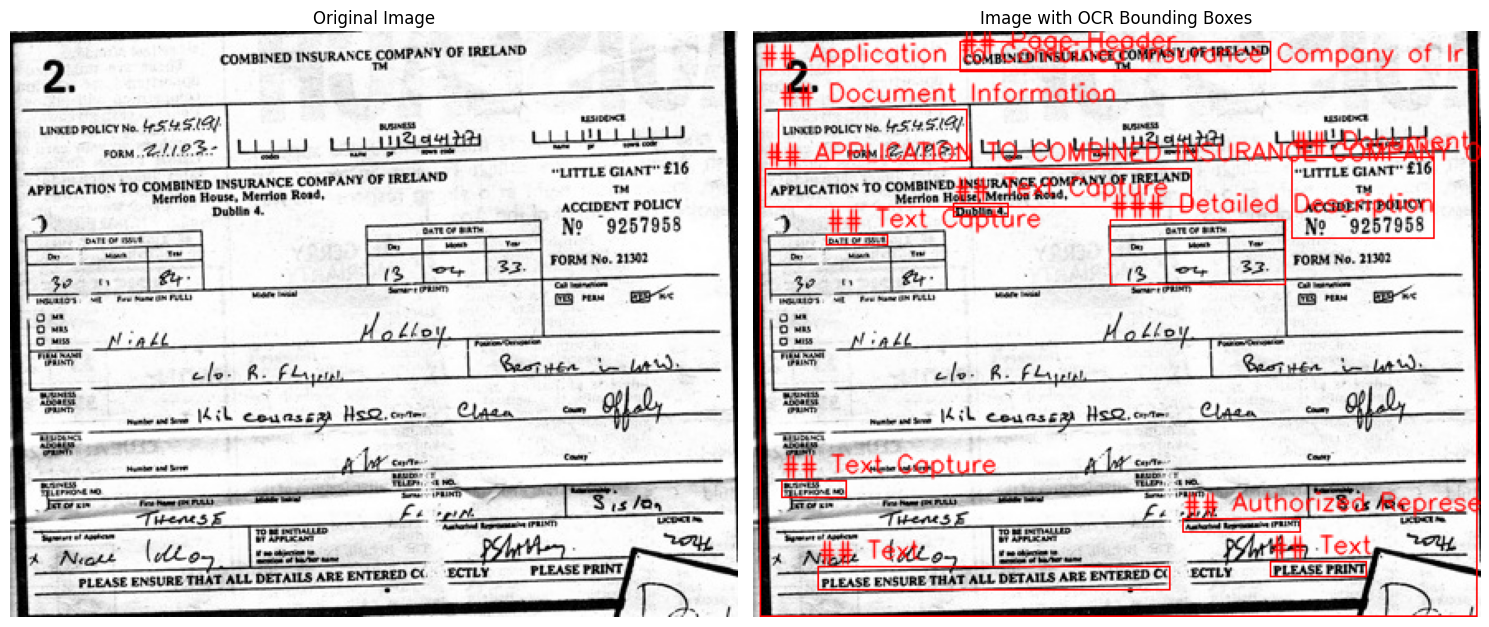

In [31]:
# Assuming your OCR result is stored in `chunks`
# and your image is at '/content/false-insurance-policy.jpeg'
display_ocr_boxes('/content/false-insurance-policy.jpeg', chunks=response.json()['data']['chunks'])